Final 2015 Ejercicio 4

Determinese la velocidad, inclinación, alcance y altitud al final de la combustión de la primera etapa de un lanzador con 3.5 de empuje específico constante, cuando a los 3 segundos del vuelo vertical inicial de la primera fase, con una velocidad de 325m/s, inclinación de 89º, alcance nulo y altitud 950m respecto del punto de lanzamiento se inicia un giro por gravedad hasta conseguir 85º de inclinación en dicho instante final de la combustión (g0=9.81m/s**2)

In [1]:
#primero importamos
import numpy as np
#importar numpy para calculo numérico
from sympy import *
#importar sympy para calculo simbolico
init_printing(use_latex=True)
from scipy import optimize

In [2]:
#declaramos variables
#Γ0 factor velocidad inicial [adim]
R0= symbols('Γ0')
#Γ0' factor de tiempo [adim]
R0prima= symbols("Γ0'")
#Γb factor velocidad final de combustión[adim]
Rb= symbols('Γb')
#Γb' factor de tiempo final de la combustión [adim]
Rbprima= symbols("Γb'")
#γ0 angulo inicial 1-beta [rad] cerca de 90º
y0= symbols("γo")
#γb angulo final de combustión[rad]
yb= symbols("γb")
#tiempo final de combustion [s]
tb= symbols("tb")
#V0 velocidad inicial de combustión [m/s]
V0= symbols("V0")
#Vb velocidad final de combustión [m/s]
Vb= symbols("Vb")
#xb posición tras combustión en x [m]
xb= symbols('xb')
#zb posción tras combustión en z [m]
zb= symbols('zb')
#r0 empuje específico
r0=symbols('r0')
#gravedad g0 [m/s**2]
g0=symbols('g0')


In [3]:
r0=3.5
t0=3
V0=325
y0=rad(89)
x0=0
z0=950
yb=rad(85)
g0=9.81

In [4]:
#calcular factor velocidad inicial
R0=(1/cos(y0))*((1-sin(y0))/(1+sin(y0)))**(r0/2)

#calcular factor tiempo inicial
R0prima=((r0+sin(y0))/(r0**2-1))*R0

#calcular factor velocidad final
Rb=(1/cos(yb))*((1-sin(yb))/(1+sin(yb)))**(r0/2)



#combinand la expresión del factor de velocidad y tiempo final, y preparandolo para iterar
Rbprima=R0prima+g0*R0*(tb-t0)/V0

f1=((r0+sin(yb))/(r0**2-1))*Rb-Rbprima
f1solve=lambdify(tb,f1)
#resolvemos para obtener tb
tb=optimize.newton(f1solve,100)
#calcular factor velocidad final
Rbprima=R0prima+g0*R0*(tb-t0)/V0


#calcular velocidad final
Vb=Rb*V0/R0

#calcular posiciones finales
zb=(V0**2/(g0*R0**2))*(1/(2*(r0**2-1)))*(Rb**2*(r0*sin(yb)+1-0.5*cos(yb)**2)-R0**2*(r0*sin(y0)+1-0.5*cos(y0)**2))+z0

xb=(V0**2/(g0*R0**2))*(1/(4*r0**2-1))*(Rb**2*cos(yb)*(2*r0+sin(yb))-R0**2*cos(y0)*(2*r0+sin(y0)))+x0

In [5]:
print('Γ0=',R0.evalf(),'   ',"Γ0'=",R0prima.evalf())
print('Γb=',Rb.evalf(),'   ',"Γb'=",Rbprima.evalf(),'tb=',tb)
print('xb=',xb.evalf(),'km','   ','zb=',zb.evalf(),'km')
print('Vb=',Vb.evalf(),'m/s')

Γ0= 3.55753408397409e-6     Γ0'= 1.42296547095210e-6
Γb= 0.000199539959001220     Γb'= 7.97484893972473e-5 tb= 732.404758994595
xb= 491778.805052849 km     zb= 6747716.53238056 km
Vb= 18229.0556167919 m/s


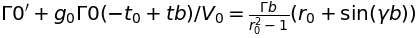

In [9]:
#declaramos variables
#Γ0 factor velocidad inicial [adim]
R0= symbols('Γ0')
#Γ0' factor de tiempo [adim]
R0prima= symbols("Γ0'")
#Γb factor velocidad final de combustión[adim]
Rb= symbols('Γb')
#γb angulo final de combustión[rad]
yb= symbols("γb")
#tiempo final de combustion [s]
tb= symbols("tb")
#V0 velocidad inicial de combustión [m/s]
V0= symbols("V0")
#r0 empuje específico
r0=symbols('r0')
#gravedad g0 [m/s**2]
g0=symbols('g0')
#tiempo final de combustion [s]
t0= symbols("t0")

f2=Eq(R0prima+g0*R0*(tb-t0)/V0,((r0+sin(yb))/(r0**2-1))*Rb)
f2